## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [238]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [239]:
data = pd.read_csv("students-data.csv",delimiter=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [240]:
data.index.name = 'number'
data.head()
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [242]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [243]:
a=data.select_dtypes(include =['object']).columns.tolist()
a

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [244]:

data1=data.select_dtypes(include =['int64'])
data1.var()


age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [245]:
name=data1.var()[data1.var()<1].index.tolist()
name

['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']

In [246]:
data.drop(name,axis = 1, inplace=True)

In [247]:
data.shape[1]

27

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [248]:
from sklearn.preprocessing import LabelEncoder

a=data.select_dtypes(include =['object']).columns.tolist()
a

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [249]:
for x in a:
    le = LabelEncoder()
    data[x]=le.fit_transform(data[x])

data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [250]:
col_set= ['G1','G2','G3']
data[col_set]=(data[col_set]>=10).astype(int)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [251]:
X = data.drop('G3', axis = 1)
y = data['G3']
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

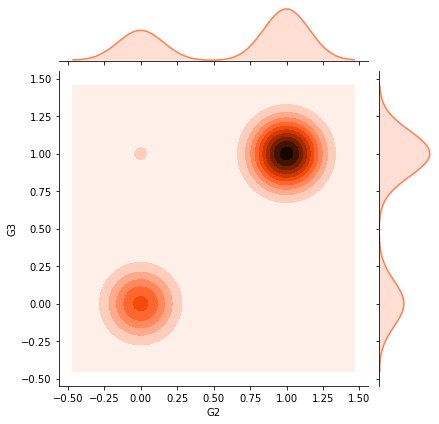

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x='G2', y='G3',data=data,kind='kde', color='coral');




The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

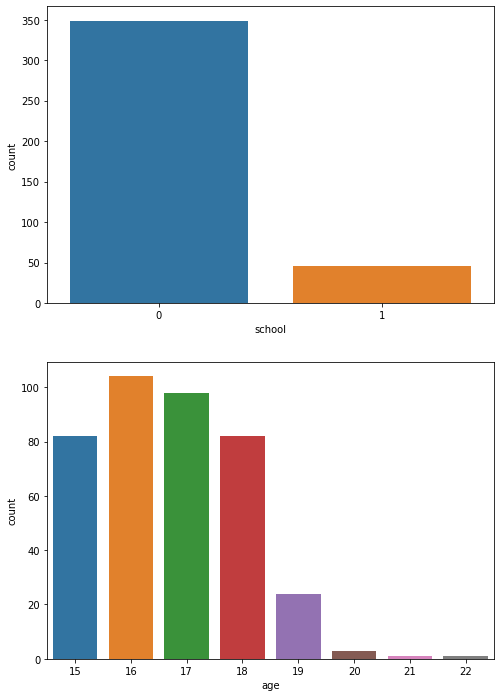

In [253]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (8,12))
sns.countplot(data['school'], ax = axes[0]);
sns.countplot(data['age'], ax = axes[1]);

## Insight
- Max no of students are in 0 school. There are very less students in school 1
- Max no students are between 15-18 age group. Very negligible students between 20-22 age group .
- Distribution is postively skewed.

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [254]:
from sklearn.model_selection import train_test_split
ratio=300/data.shape[0]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=1)
print('Number of observation in training',x_train.shape[0])


Number of observation in training 300


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [255]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

Prediction_train = logmodel.predict(x_train)
Prediction_test = logmodel.predict(x_test)

print(classification_report(y_train,Prediction_train))
print(classification_report(y_test,Prediction_test))

print("Confusion matrix for training",confusion_matrix(y_train, Prediction_train))
print("Confusion matrix for testing",confusion_matrix(y_test, Prediction_test))

print("Precision for training",precision_score(y_train, Prediction_train))
print("Precision for testing",precision_score(y_test, Prediction_test))

print("Recall for training",recall_score(y_train, Prediction_train))
print("Recall for testing",recall_score(y_test, Prediction_test))

print("F1 score for training",f1_score(y_train, Prediction_train))
print("F1 score for testing",f1_score(y_test, Prediction_test))

print("Accuracy for training",logmodel.score(x_train,y_train))
print("Accuracy for testing",logmodel.score(x_test,y_test))

cm_training=confusion_matrix(y_test, Prediction_test)
TP = cm_training[1][1] 
FP = cm_training[0][1] 
FN = cm_training[1][0] 
TN = cm_training[0][0]
accuracy_training = (TP+TN)/(TP+FP+FN+TN)
print('accuracy_training',accuracy_training)
precision_training = TP/(TP+FP)
print('precision_training',precision_training)
recall_training = TP/(TP+FN)
print('recall_training',recall_training)
F1_score_training=2*precision*recall/(precision+recall)
print('F1_score_training',F1_score_training)

cm_testing=confusion_matrix(y_test, Prediction_test)
TP = cm_testing[1][1] 
FP = cm_testing[0][1] 
FN = cm_testing[1][0] 
TN = cm_testing[0][0]
accuracy_testing = (TP+TN)/(TP+FP+FN+TN)
print('accuracy_testing',accuracy_testing)
precision_testing = TP/(TP+FP)
print('precision_testing',precision_testing)
recall_testing = TP/(TP+FN)
print('recall_testing',recall_testing)
F1_score_testing=2*precision_testing*recall_testing/(precision_testing+recall_testing)
print('F1_score_testing',F1_score_testing)

table_metric = [[f1_score(y_train, Prediction_train),f1_score(y_test, Prediction_test)],
       [logmodel.score(x_train,y_train),logmodel.score(x_test,y_test)],
      [precision_score(y_train, Prediction_train),precision_score(y_test, Prediction_test)],
      [recall_score(y_train, Prediction_train),recall_score(y_test, Prediction_test)]]
Metric = pd.DataFrame(table_metric, columns = ['Training', 'Testing'], index = ['f1 score', 'accuracy','precision','recall'])
Metric


              precision    recall  f1-score   support

           0       0.87      0.94      0.91       102
           1       0.97      0.93      0.95       198

    accuracy                           0.93       300
   macro avg       0.92      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

    accuracy                           0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95

Confusion matrix for training [[ 96   6]
 [ 14 184]]
Confusion matrix for testing [[25  3]
 [ 6 61]]
Precision for training 0.968421052631579
Precision for testing 0.953125
Recall for training 0.9292929292929293
Recall for testing 0.9104477611940298
F1 score for training 0.9484536082474226
F1 score for testing 0.931297709923664
Accuracy for tra

,Training,Testing
f1 score,0.948454,0.931298
accuracy,0.933333,0.905263
precision,0.968421,0.953125
recall,0.929293,0.910448


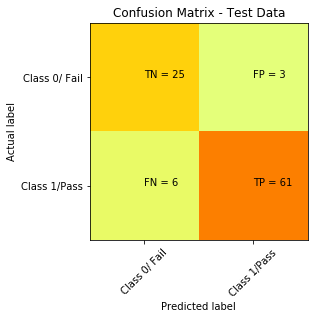

In [256]:
cm = confusion_matrix(y_test, Prediction_test)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0/ Fail','Class 1/Pass']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [257]:
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs1 = sfs(logmodel, k_features=26, forward=True, scoring='accuracy', cv=5)
sfs1 = sfs1.fit(x_train.values, y_train.values)


In [258]:
#sfs1.get_metric_dict()

In [259]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

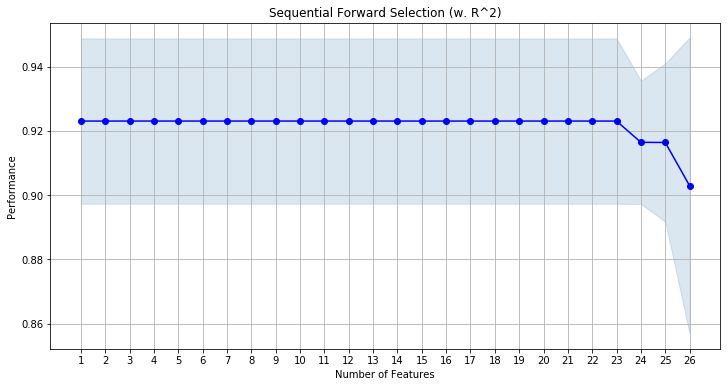

In [260]:
fig = plot_sfs(sfs1.get_metric_dict(), figsize = (12,6))

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [261]:
sfs1 = sfs(logmodel, k_features = 1, forward = True, scoring = 'accuracy', cv = 5)
sfs1 = sfs1.fit(x_train.values, y_train.values)
sfs1.get_metric_dict()

{1: {'feature_idx': (25,),
  'cv_scores': array([0.96721311, 0.91803279, 0.93333333, 0.89830508, 0.89830508]),
  'avg_score': 0.9230378808928407,
  'feature_names': ('25',),
  'ci_bound': 0.033049330991670435,
  'std_dev': 0.025713502305916774,
  'std_err': 0.012856751152958385}}

In [262]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
column_name=x_train.columns.get_values()[feat_cols]
print(column_name)

[25]
['G2']


In [263]:
logmodel.fit(x_train[column_name], y_train)

Prediction_train = logmodel.predict(x_train[column_name])
Prediction_test = logmodel.predict(x_test[column_name])

print(classification_report(y_train,Prediction_train))
print(classification_report(y_test,Prediction_test))

print("Confusion matrix for training",confusion_matrix(y_train, Prediction_train))
print("Confusion matrix for testing",confusion_matrix(y_test, Prediction_test))

print("Precision for training",precision_score(y_train, Prediction_train))
print("Precision for testing",precision_score(y_test, Prediction_test))

print("Recall for training",recall_score(y_train, Prediction_train))
print("Recall for testing",recall_score(y_test, Prediction_test))

print("F1 score for training",f1_score(y_train, Prediction_train))
print("F1 score for testing",f1_score(y_test, Prediction_test))

print("Accuracy for training",logmodel.score(x_train[column_name],y_train))
print("Accuracy for testing",logmodel.score(x_test[column_name],y_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       102
           1       0.97      0.91      0.94       198

    accuracy                           0.92       300
   macro avg       0.91      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

    accuracy                           0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95

Confusion matrix for training [[ 97   5]
 [ 18 180]]
Confusion matrix for testing [[25  3]
 [ 6 61]]
Precision for training 0.972972972972973
Precision for testing 0.953125
Recall for training 0.9090909090909091
Recall for testing 0.9104477611940298
F1 score for training 0.9399477806788512
F1 score for testing 0.931297709923664
Accuracy for tra

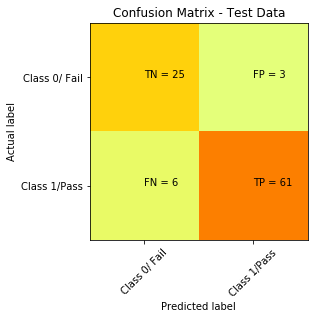

In [264]:
cm = confusion_matrix(y_test, Prediction_test)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0/ Fail','Class 1/Pass']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [265]:
table_metric = [[f1_score(y_train, Prediction_train),f1_score(y_test, Prediction_test)],
       [logmodel.score(x_train[column_name],y_train),logmodel.score(x_test[column_name],y_test)],
      [precision_score(y_train, Prediction_train),precision_score(y_test, Prediction_test)],
      [recall_score(y_train, Prediction_train),recall_score(y_test, Prediction_test)]]
Metric = pd.DataFrame(table_metric, columns = ['Training', 'Testing'], index = ['f1 score', 'accuracy','precision','recall'])
Metric

,Training,Testing
f1 score,0.939948,0.931298
accuracy,0.923333,0.905263
precision,0.972973,0.953125
recall,0.909091,0.910448


# Naive bayes with Iris data

### Import Iris.csv

In [266]:
data_iris = pd.read_csv('iris.csv')

In [267]:
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [268]:
data_iris.shape

(152, 6)

In [269]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [270]:
data_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,151.0,5.843709,0.825314,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,151.0,1.202649,0.762185,0.1,0.30,1.30,1.80,2.5


In [271]:
data_iris.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [272]:
data_iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [273]:
data_iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [274]:
le = LabelEncoder()
data_iris['Species']=le.fit_transform(data_iris['Species'])
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [275]:
data_iris = data_iris.apply(lambda x:x.fillna(x.median()),axis = 0)
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null int32
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [276]:
X = data_iris.drop('Species', axis = 1)
y = data_iris['Species']
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


### Find the distribution of target variable (Class)

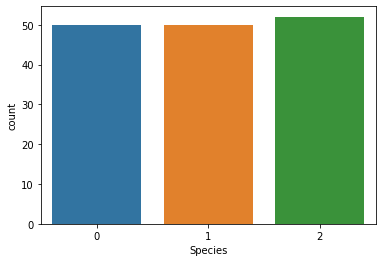

In [277]:
sns.countplot(y)

### Plot the distribution of target variable using histogram

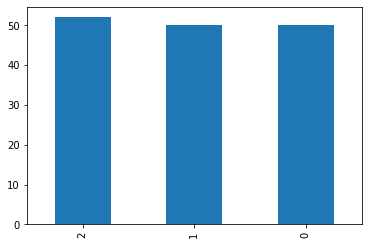

In [278]:
pd.value_counts(data_iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

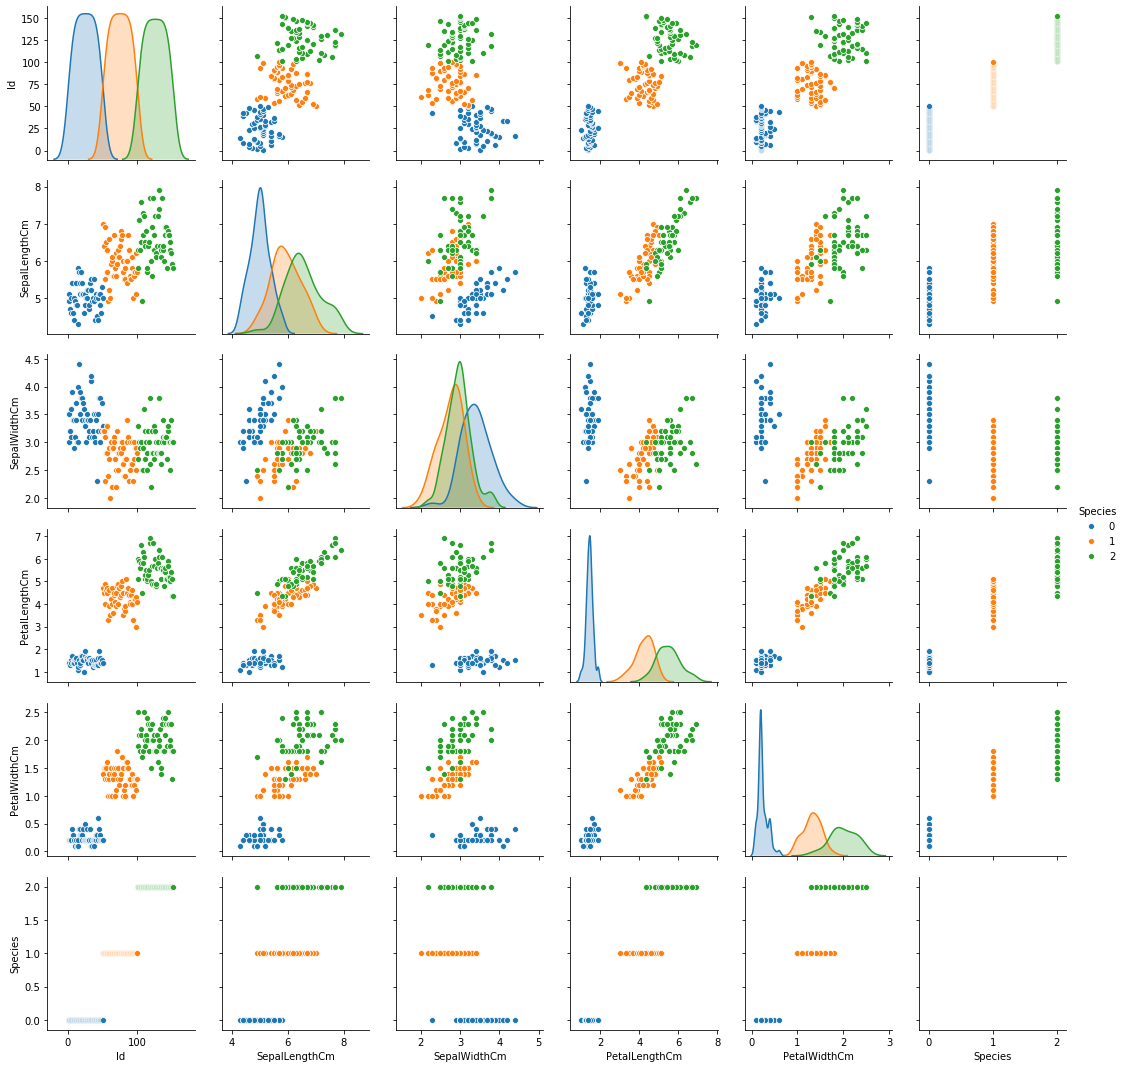

In [279]:
sns.pairplot(data_iris,hue = 'Species')

### Summary Statistics and explain insights for at least 2 variables

In [280]:
data_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.30,1.30,1.80,2.5
Species,152.0,1.013158,0.821780,0.0,0.00,1.00,2.00,2.0


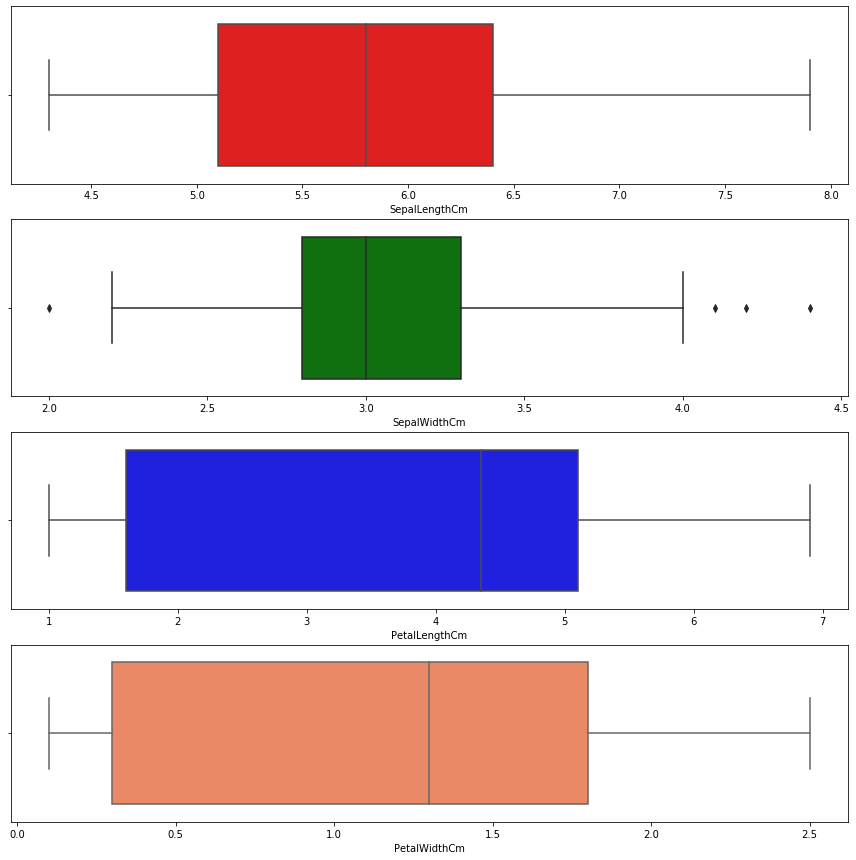

In [281]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (15,15))
sns.boxplot(data_iris['SepalLengthCm'], color ='r', ax = axes[0]);
sns.boxplot(data_iris['SepalWidthCm'], color = 'g', ax = axes[1]);
sns.boxplot(data_iris['PetalLengthCm'], color = 'b', ax = axes[2]);
sns.boxplot(data_iris['PetalWidthCm'], color = 'coral', ax = axes[3]);


## Insight
- for petal length mean is lower than median so its distribution is left skewed
- There are few outliers in sepal width
- mean and median are verl close for Sepal length. so, it has uniform distribution

### Correlation among all variables and give your insights

In [282]:
data_iris.drop('Id', axis = 1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


### Split data in Training and Validation in 80:20

In [283]:
X = X.drop('Id', axis = 1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [284]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

### Do Feature Scaling

In [285]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

### Train and Fit NaiveBayes Model

In [286]:
from sklearn.naive_bayes import GaussianNB

#create an instance and fit the model 

nb = GaussianNB()
nb.fit(x_train_scaled, y_train)

Prediction_train = nb.predict(x_train_scaled)
Prediction_test = nb.predict(x_test_scaled)

print("classification_reporty for training")
print(classification_report(y_train,Prediction_train))
print("classification_reporty for testing")
print(classification_report(y_test,Prediction_test))

print("confusion matrix for training")
print(confusion_matrix(y_train, Prediction_train))
print("confusion matrix for testing")
print(confusion_matrix(y_test, Prediction_test))

cm=confusion_matrix(y_test, Prediction_test)
TP = np.diag(cm)
TP
FP = np.sum(cm, axis=0) - TP
FP
FN = np.sum(cm, axis=1) - TP
FN

num_classes = 3
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))
TN

l = len(x_train_scaled)
for i in range(num_classes):
    print(TP[i] + FP[i] + FN[i] + TN[i] == l)
precision = TP/(TP+FP)
print('precision', precision)
recall = TP/(TP+FN)
print('recall',recall)
f1_score=2*precision*recall/(precision+recall)
print('f1_score', f1_score)
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy', Accuracy)

print("Accuracy for training",nb.score(x_train_scaled,y_train))
print("Accuracy for testing",nb.score(x_test_scaled,y_test))


classification_reporty for training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.92      0.92      0.92        39
           2       0.92      0.92      0.92        39

    accuracy                           0.95       121
   macro avg       0.95      0.95      0.95       121
weighted avg       0.95      0.95      0.95       121

classification_reporty for testing
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.77      0.91      0.83        11
           2       0.91      0.77      0.83        13

    accuracy                           0.87        31
   macro avg       0.89      0.89      0.89        31
weighted avg       0.88      0.87      0.87        31

confusion matrix for training
[[43  0  0]
 [ 0 36  3]
 [ 0  3 36]]
confusion matrix for testing
[[ 7  0  0]
 [ 0 10  1]
 [ 0  3 10]]
False
False
False
precision [1.   

### Print Accuracy and Confusion Matrix and Conclude your findings

In [287]:
x_training_data = pd.DataFrame(x_train_scaled, columns=X.columns)
x_testing_data = pd.DataFrame(x_test_scaled, columns=X.columns)

In [288]:
sfs1 = sfs(nb, k_features = 4, forward = True, scoring = 'accuracy', cv = 5)
sfs1 = sfs1.fit(x_training_data, y_train)

In [289]:
sfs1.get_metric_dict()

{1: {'feature_idx': (3,),
  'cv_scores': array([0.96      , 0.96      , 0.96      , 0.95833333, 0.95454545]),
  'avg_score': 0.9585757575757576,
  'feature_names': ('PetalWidthCm',),
  'ci_bound': 0.002719689643457007,
  'std_dev': 0.002116010939405556,
  'std_err': 0.0010580054697027779},
 2: {'feature_idx': (0, 3),
  'cv_scores': array([0.96      , 1.        , 0.96      , 0.95833333, 0.95454545]),
  'avg_score': 0.9665757575757576,
  'feature_names': ('SepalLengthCm', 'PetalWidthCm'),
  'ci_bound': 0.02163207546821162,
  'std_dev': 0.016830489626970535,
  'std_err': 0.008415244813485268},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.96      , 1.        , 0.96      , 0.91666667, 0.95454545]),
  'avg_score': 0.9582424242424242,
  'feature_names': ('SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm'),
  'ci_bound': 0.03396712641668007,
  'std_dev': 0.02642757832710138,
  'std_err': 0.013213789163550689},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([0.92      , 1.       

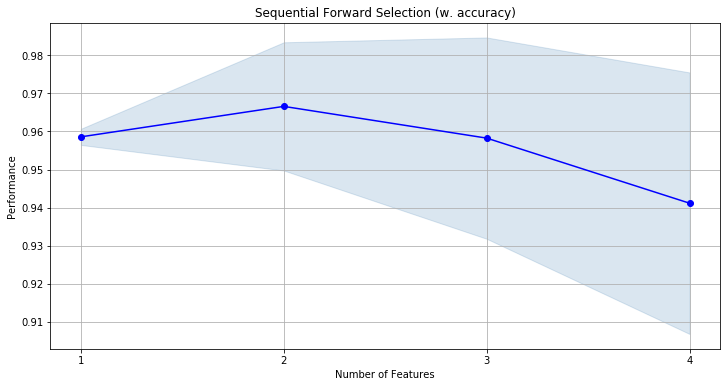

In [290]:
fig = plot_sfs(sfs1.get_metric_dict(), figsize = (12,6))

plt.title('Sequential Forward Selection (w. accuracy)')
plt.grid()
plt.show()


In [291]:
sfs1 = sfs(nb, k_features = 2, forward = True, scoring = 'accuracy', cv = 5)
sfs1 = sfs1.fit(x_training_data, y_train)

In [292]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
column_name=x_train.columns.get_values()[feat_cols]
print(column_name)

[0, 3]
['SepalLengthCm' 'PetalWidthCm']


In [293]:
nb.fit(x_training_data[column_name], y_train)


Prediction_train = nb.predict(x_training_data[column_name])
Prediction_test = nb.predict(x_testing_data[column_name])

print("classification_reporty for training")
print(classification_report(y_train,Prediction_train))
print("classification_reporty for testing")
print(classification_report(y_test,Prediction_test))

print("confusion matrix for training \n",confusion_matrix(y_train, Prediction_train))
print("confusion matrix for training\n",confusion_matrix(y_test, Prediction_test))

print("Accuracy for training",nb.score(x_training_data[column_name],y_train))
print("Accuracy for testing",nb.score(x_testing_data[column_name],y_test))

classification_reporty for training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        39
           2       0.95      0.95      0.95        39

    accuracy                           0.97       121
   macro avg       0.97      0.97      0.97       121
weighted avg       0.97      0.97      0.97       121

classification_reporty for testing
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.79      1.00      0.88        11
           2       1.00      0.77      0.87        13

    accuracy                           0.90        31
   macro avg       0.93      0.92      0.92        31
weighted avg       0.92      0.90      0.90        31

confusion matrix for training 
 [[43  0  0]
 [ 0 37  2]
 [ 0  2 37]]
confusion matrix for training
 [[ 7  0  0]
 [ 0 11  0]
 [ 0  3 10]]
Accuracy for training 0.966942

## Insight
- Sepal length and Petal width are important feature
- If we consider other 2 features then accuracy drops.
- Model is able to classify class 0 correctly.